In [1]:
from vnstock import *
from Tools.function import *
from Tools.operators import *
from Tools.technical import *

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests

##### VN30

In [3]:
x='2023-02-16'
ticket = ['ACB', 'BCM', 'BID', 'BVH', 'CTG', 'FPT', 'GAS', 'GVR', 'HDB', 'HPG', 'MBB', 'MSN', 'MWG', 'NVL', 'PDR', 'PLX', 'POW', 'SAB', 'SSI', 'STB', 'TCB', 'TPB', 'VCB', 'VHM', 'VIB', 'VIC', 'VJC', 'VNM', 'VPB', 'VRE']
frame = []
for i in ticket:
    a = stock_historical_data(symbol=i, 
                            start_date=x,
                            end_date=x)
    a["ticker"] = i
    frame.append(a)
    
q = pd.concat(frame)
close= q.pivot_table(values="Close", columns="ticker", index="TradingDate")
high= q.pivot_table(values="High", columns="ticker", index="TradingDate")
low= q.pivot_table(values="Low", columns="ticker", index="TradingDate")
open= q.pivot_table(values="Open", columns="ticker", index="TradingDate")
volume = q.pivot_table(values="Volume", columns="ticker", index="TradingDate")

In [4]:
close= close.to_csv("Data/close.csv",mode="a",header=False)
high= high.to_csv("Data/high.csv",mode="a",header=False)
low= low.to_csv("Data/low.csv",mode="a",header=False)
open= open.to_csv("Data/open.csv",mode="a",header=False)
volume= volume.to_csv("Data/volume.csv",mode="a",header=False)

In [2]:
close= pd.read_csv("Data/close.csv",index_col="TradingDate")
close.index = pd.to_datetime(close.index)
high= pd.read_csv("Data/high.csv",index_col="TradingDate")
high.index = pd.to_datetime(high.index)
low= pd.read_csv("Data/low.csv",index_col="TradingDate")
low.index = pd.to_datetime(low.index)
open= pd.read_csv("Data/open.csv",index_col="TradingDate")
open.index = pd.to_datetime(open.index)
volume= pd.read_csv("Data/volume.csv",index_col="TradingDate")
volume.index = pd.to_datetime(open.index)

returns = close.pct_change()

### volume/adv20

### Prob weight model

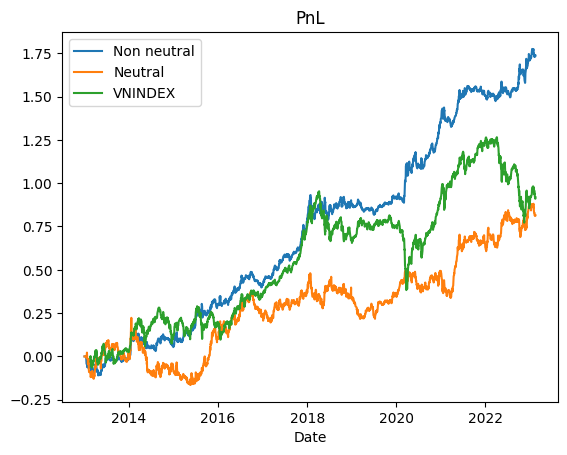

In [5]:
prob = prob_weights(close,10)

w = weights(prob,neutrali=0)
w1 = weights(prob,neutrali=1)

a = Simresult(w,returns=returns)
a.plot_pnl("Non neutral")

b = Simresult(w1,returns=returns)
b.plot_pnl("Neutral")

plot_vnindex()

In [6]:
a.get_overall()

,Return,Sharpe,Turnover,Fitness,Margin
0,0.173284,1.246683,0.378375,0.843672,457.967369


### Markowitz model

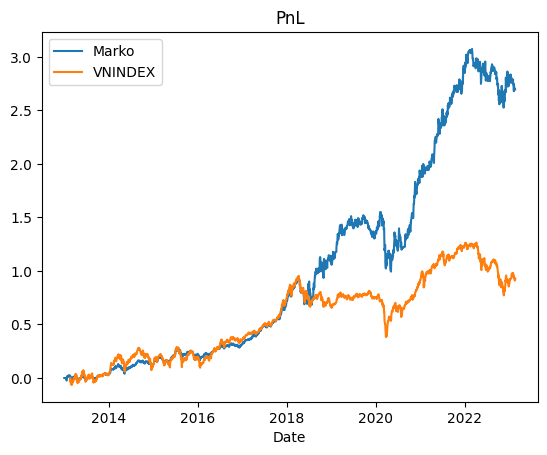

In [6]:
mark = marko_weights(close,lag=10)
a = Simresult(mark,returns=close.pct_change())
a.plot_pnl("Marko")

plot_vnindex()

In [7]:
a.get_summary()

,Return,Sharpe,Turnover,Fitness,Margin
TradingDate,,,,,
2013,0.037903,0.521421,0.000000,0.287124,inf
2014,0.091851,1.054659,0.000000,0.904066,inf
2015,0.093926,0.960856,0.000000,0.832907,inf
2016,0.098835,1.235096,0.000000,1.098247,inf
2017,0.396302,4.764245,0.000000,8.483056,inf
2018,0.408062,0.991476,0.095467,1.791391,4274.389310
2019,0.256358,0.918631,0.200000,1.040039,1281.791139
2020,0.545455,1.140511,0.174603,2.015825,3123.971292
2021,0.981200,2.277145,0.182531,5.279598,5375.519063


### alpha1 = close-ts_product(close,2)^0.5

In [10]:
alpha4 = close-ts_product(close,2)**0.5

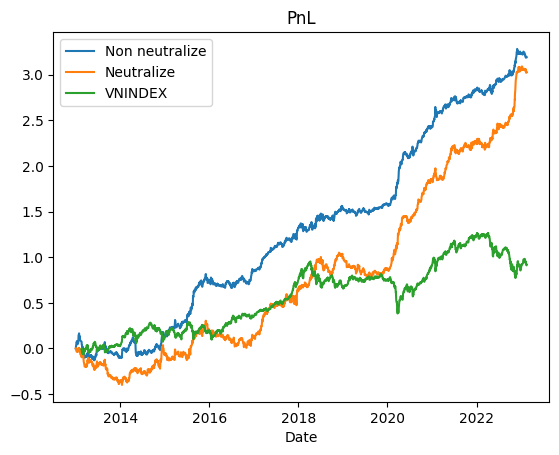

In [11]:
w = weights(alpha4,neutrali=0)
w1 =weights(alpha4,neutrali=1)

returns = close.pct_change()
a = Simresult(w,returns)
a.plot_pnl("Non neutralize")

b = Simresult(w1,returns)
b.plot_pnl("Neutralize")

plot_vnindex()

### alpha2=ts_zscore(close,2)

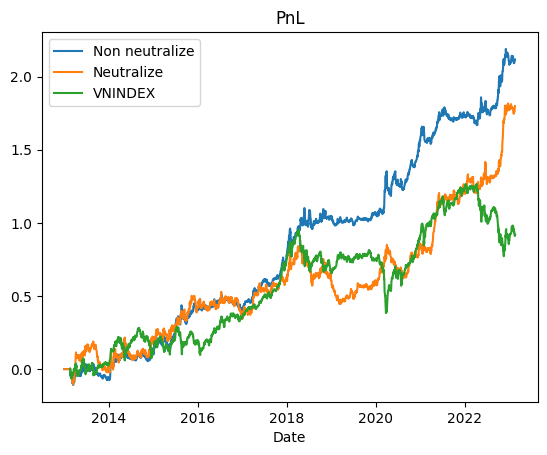

In [4]:
alpha7 = ts_zscore(close,30)
w =weights(alpha7, neutrali=0)
w1 =weights(alpha7,neutrali=1)

returns = close.pct_change()
a = Simresult(w,returns)
a.plot_pnl("Non neutralize")

b = Simresult(w1,returns)
b.plot_pnl("Neutralize")

plot_vnindex()

In [5]:
a.get_overall()

,Return,Sharpe,Turnover,Fitness,Margin
0,0.211438,1.235484,0.331841,0.986195,637.164311


### Merge alpha

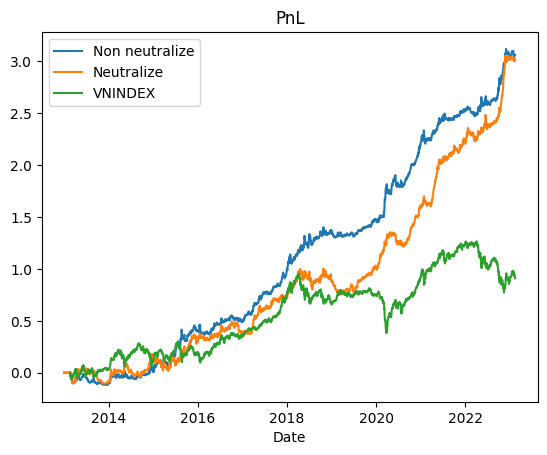

In [8]:
alpha = (0.4*alpha7+0.4*ts_zscore(close,2))
w =weights(alpha, neutrali=0)
w1 =weights(alpha,neutrali=1)

returns = close.pct_change()
a = Simresult(w,returns)
a.plot_pnl("Non neutralize")

b = Simresult(w1,returns)
b.plot_pnl("Neutralize")

plot_vnindex()

### volum/adv20

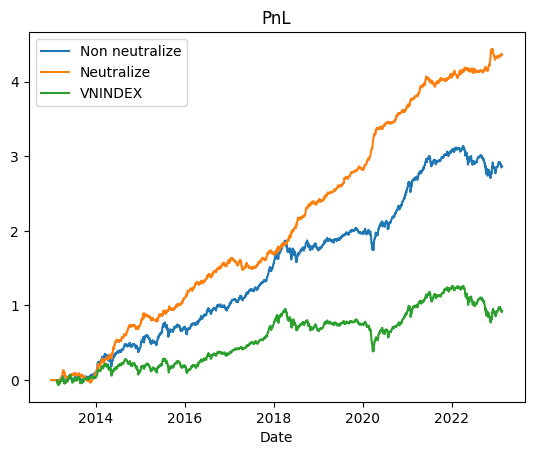

In [2]:
alpha5 = rank(volume/ts_mean(ts_decay_linear(volume,30),20))
w =weights(alpha5, neutrali=0)
w1 =weights(alpha5,neutrali=1)

returns = close.pct_change()
a = Simresult(w,returns)
a.plot_pnl("Non neutralize")

b = Simresult(w1,returns)
b.plot_pnl("Neutralize")

plot_vnindex()

In [3]:
b.get_overall()

,Return,Sharpe,Turnover,Fitness,Margin
0,0.435499,2.782407,1.570546,1.465172,277.291149


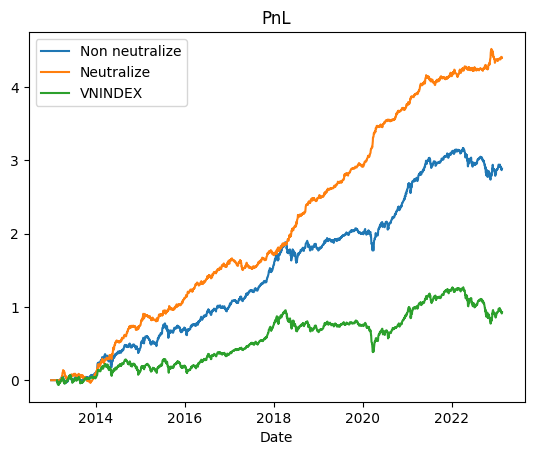

In [4]:
alpha = mae(alpha5)
w =weights(alpha, neutrali=0)
w1 =weights(alpha,neutrali=1)

returns = close.pct_change()
a = Simresult(w,returns)
a.plot_pnl("Non neutralize")

b = Simresult(w1,returns)
b.plot_pnl("Neutralize")

plot_vnindex()

In [5]:
b.get_overall()

,Return,Sharpe,Turnover,Fitness,Margin
0,0.439098,2.764002,1.572852,1.460411,279.173085


In [11]:
w1.iloc[-1,:][w1.iloc[-1,:]<0].sum()

-1.0

In [12]:
save_weights(w1,x)